# Выбор лучших рынков для рекламы
Моя компания предлагает курсы программирования, ориентированные на веб-разработку и мобильную разработку, а также на другие области.

**Цель:**  определить два лучших рынка для рекламы продукции компании.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
df = pd.read_csv('data/Coders-Survey-Data.csv', low_memory=False)
df.shape

(18175, 136)

In [2]:
pd.set_option('display.max_columns', 136)
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

# Целевая аудитория

In [3]:
# Частотное распределение JobRoleInterst (проценты)
df['JobRoleInterest'].value_counts(normalize=True)[:10] * 100

Full-Stack Web Developer                               11.770595
  Front-End Web Developer                               6.435927
  Data Scientist                                        2.173913
Back-End Web Developer                                  2.030892
  Mobile Developer                                      1.673341
Game Developer                                          1.630435
Information Security                                    1.315789
Full-Stack Web Developer,   Front-End Web Developer     0.915332
  Front-End Web Developer, Full-Stack Web Developer     0.800915
  Product Manager                                       0.786613
Name: JobRoleInterest, dtype: float64

Из краткого взгляда на таблицу частот видно, что есть люди, которые сосредоточены на одной теме. В то время как другие интересуются более чем одним предметом.

In [4]:
# распределение количества интересов
jobRoles_noNA = df['JobRoleInterest'].dropna()  
jobRoles_split = jobRoles_noNA.str.split(pat=',')

# количество различных ролей для каждого человека в списке
jobRoles_counts = jobRoles_split.apply(lambda x: len(x))
jobRoles_counts.value_counts(normalize=True) * 100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

Более пристальный взгляд на выборку показывает, что 31,7% опрошенных сосредоточены на изучении одного предмета. Остальные заинтересованы в изучении более чем одной темы.

Поскольку в центре внимания платформы моей компании находится веб и мобильная разработка, надо выяснить, сколько людей интересуются любой из этих тем.

In [5]:
# Распределение людей, заинтересованных в web/mobiled dev
web_mobile = df['JobRoleInterest'].str.contains('Web|Mobile',regex=True, case=False)
web_mobile_dist = web_mobile.value_counts(normalize=True) * 100
print(web_mobile_dist)

True     86.312929
False    13.687071
Name: JobRoleInterest, dtype: float64


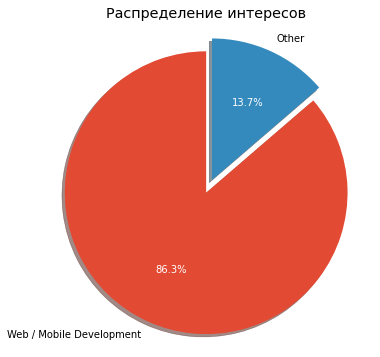

In [6]:
labels = ['Web / Mobile Development', 'Other']
explode = (0, 0.1)
plt.style.use('ggplot')
fig1, ax1 = plt.subplots(figsize=(6,6))
_, _, autotexts = ax1.pie(web_mobile_dist, explode=explode, labels=labels,
                          autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Распределение интересов')

for autotext in autotexts: autotext.set_color('white')
plt.show()

Из приведенной выше диаграммы видно, что подавляющее большинство (86,3%) кандидатов проявляют интерес к *Web/Mobile Development* (фокус внимания компании).

Исходя из собранной информации, выборка имеет правильную целевую аудиторию для моих целей.

## Распределение жилья кодеров
Колонка *CountryLive* содержит информацию о том, где в настоящее время живут люди.
<br>Буду использовать эту инфу, чтобы определить, на какие страны должны быть нацелены объявления.

In [7]:
jobInterest = df[df['JobRoleInterest'].notnull()].copy()
CountryLive_noNA = jobInterest['CountryLive'].dropna()
country_freq = CountryLive_noNA.value_counts()
country_percent = CountryLive_noNA.value_counts(normalize=True) * 100

CountryLive_dist = pd.DataFrame({'Absolute':country_freq, 'Percentage(%)':country_percent})
CountryLive_dist.head(10)

,Absolute,Percentage(%)
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


Исходя из результатов таблицы частот, представляется, что было бы полезно выбрать Соединенные Штаты Америки и Индию в качестве целевых рынков для рекламы.

## Бюджет на обучение
Хотя важно знать географическое распределение целевой аудитории, важно также определить, какие рынки готовы тратить деньги на обучение, чтобы моя компания была прибыльной.

Надо сосредоточить внимани на США, Индии, Великобритании и Канаде, поскольку именно на этих рынках чаще всего появляются новые кодеры.

In [8]:
# divison errors
jobInterest['MonthsProgramming'].replace(to_replace=0, value=1, inplace=True)

# новая колонка - Monthly Budget
jobInterest['MonthlyBudget'] = jobInterest['MoneyForLearning'] / jobInterest['MonthsProgramming']

In [9]:
# Drop rows with null values in MonthlyBudget or CountryLive
jobInterest = jobInterest.dropna(subset=['MonthlyBudget', 'CountryLive'])
# Group MonthlyBudget data by country of residence
countryExpense = jobInterest[[ 'CountryLive','MonthlyBudget']]
avgExpenseByCountry = countryExpense.groupby('CountryLive').mean()

# изолирование интресных стран
avgExpenseByMarket = avgExpenseByCountry.loc[['United States of America',
                                             'India',
                                             'United Kingdom',
                                             'Canada']]

avgExpenseByMarket.sort_values('MonthlyBudget', ascending=False)

,MonthlyBudget
CountryLive,
United States of America,227.997996
India,135.100982
Canada,113.510961
United Kingdom,45.534443


Исходя из этих цифр, представляется ненормальным, что ежемесячный бюджет Индии будет выше, чем у Канады и Соединенного Королевства (исходя из ВВП на душу населения).

## Выявление и устранение выбросов

In [10]:
def drawCountryExpend(countryExpense, ):
    # MonthlyBudget by country
    expense_USA   = countryExpense.loc[countryExpense['CountryLive']=='United States of America']
    expense_India = countryExpense.loc[countryExpense['CountryLive']=='India']
    expense_UK    = countryExpense.loc[countryExpense['CountryLive']=='United Kingdom']
    expense_Canada = countryExpense.loc[countryExpense['CountryLive']=='Canada']

    marketExpense = pd.concat([expense_USA, expense_India, expense_Canada, expense_UK]).reset_index()

    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x="CountryLive", y="MonthlyBudget", data=marketExpense)
    plt.title('Monthly Country Expenditure', fontsize = 16)
    plt.ylabel('USD per month')
    plt.xlabel('Country')

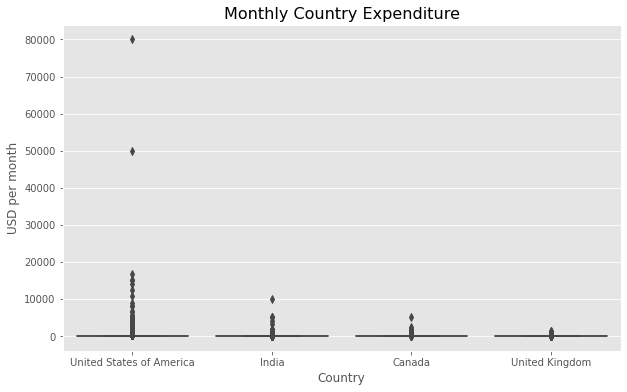

In [11]:
drawCountryExpend(countryExpense, )

Из приведенного выше графика видно, что для Америки существуют экстремальные выбросы с точки зрения количества потраченных средств в месяц. Надо убрать точки, где ежемесячные расходы превышают $ 20000.

In [12]:
countryExpense = countryExpense.loc[countryExpense['MonthlyBudget']<20000]

In [13]:
avgExpenseByCountry = countryExpense.groupby('CountryLive').mean()

avgExpenseByMarket = avgExpenseByCountry.loc[['United States of America',
                                             'India',
                                             'United Kingdom',
                                             'Canada']]

avgExpenseByMarket.sort_values('MonthlyBudget', ascending=False)

,MonthlyBudget
CountryLive,
United States of America,183.800110
India,135.100982
Canada,113.510961
United Kingdom,45.534443


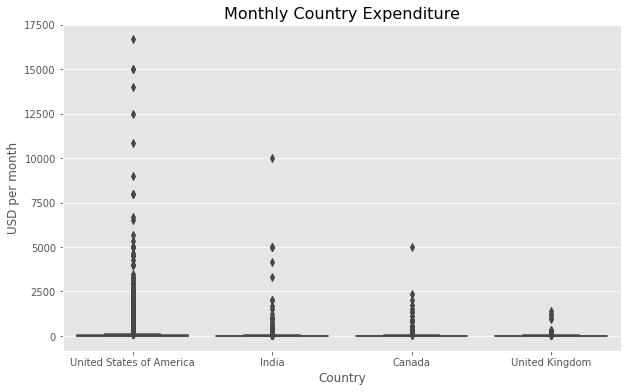

In [14]:
drawCountryExpend(countryExpense,)

Видим, что в США все еще существуют экстремальные выбросы, когда люди тратят в среднем более 6000 долларов в месяц. <br>Индия также имеет экстремальные выбросы для людей, тратящих в среднем более 3000 долларов в месяц. 
<br>Наконец, в Канаде есть человек, который тратит в среднем более 4000 долларов в месяц.

In [15]:
outliers_USA = countryExpense.loc[(countryExpense['MonthlyBudget']>6000) & 
                                 (countryExpense['CountryLive']=='United States of America')]

outliers_India = countryExpense.loc[(countryExpense['MonthlyBudget']>3000) & 
                                   (countryExpense['CountryLive']=='India')]

outliers_Canada = countryExpense.loc[(countryExpense['MonthlyBudget']>4000) & 
                                    (countryExpense['CountryLive']=='Canada')]

countryExpense = countryExpense.drop(outliers_USA.index)  \
                               .drop(outliers_India.index)\
                               .drop(outliers_Canada.index)

In [16]:
avgExpenseByCountry = countryExpense.groupby('CountryLive').mean()

avgExpenseByMarket = avgExpenseByCountry.loc[['United States of America',
                                             'India',
                                             'United Kingdom',
                                             'Canada']]

avgExpenseByMarket.sort_values('MonthlyBudget', ascending=False)

,MonthlyBudget
CountryLive,
United States of America,142.654608
Canada,93.065400
India,65.758763
United Kingdom,45.534443


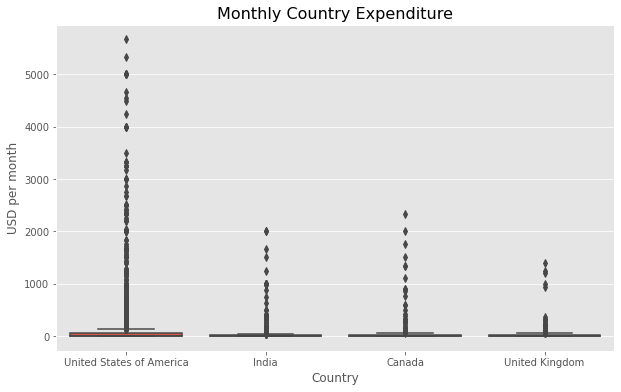

In [17]:
drawCountryExpend(countryExpense,)

Исходя из распределения ежемесячных расходов в представленных графиках и географического распределения целевой аудитории, очевидным выбором было бы размещение рекламы в Соединенных Штатах Америки. Вторым выбором будет Канада, поскольку этот рынок имеет вторые по величине среднемесячные расходы, а также достаточно крупное целевое население.

Альтернативным вариантом для Канады была бы Индия, поскольку, несмотря на более низкие среднемесячные расходы, там почти в два раза больше потенциальных клиентов. Несмотря на это, Канада останется моим вторым выбором, поскольку компания потенциально может сэкономить расходы на рекламу, оставаясь в Северной Америке, а не занимаясь маркетингом за рубежом.